In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
from matplotlib import font_manager

# Add the font to Matplotlib's font manager
font_manager.fontManager.addfont("/Library/Fonts/PlusJakartaSans-Regular.ttf")

# Set the font globally for all text elements
plt.rcParams['font.family'] = 'Plus Jakarta Sans'

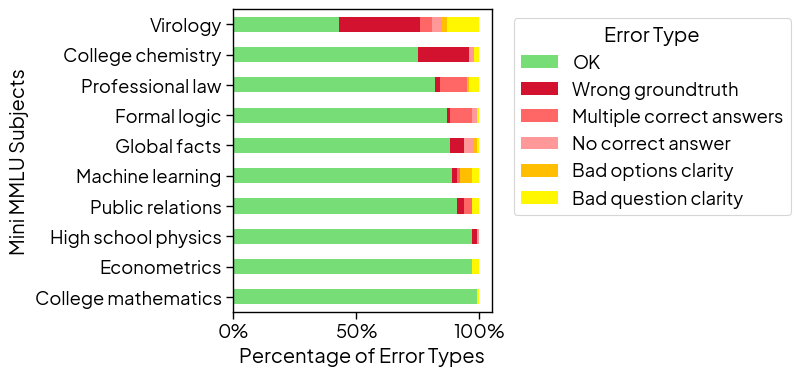

In [51]:
def error_type_capitalize(error_type):
    if error_type.lower() == "ok":
        return "OK"
    else:
        return error_type.replace("_", " ").capitalize()


configs = [
    "college_chemistry",
    "econometrics",
    "formal_logic",
    "global_facts",
    "high_school_physics",
    "public_relations",
    "virology",
    "college_mathematics",
    "machine_learning",
    "professional_law"
]

# Set a general style
# plt.style.use('whitegrid')
sns.set_context("paper", font_scale=1.5)  # Adjust font scale for better readability


# Create a vertically long figure to fit a single column
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the figure size as needed

# Initialize a DataFrame to store all data
all_data = pd.DataFrame()

for config in configs:
    # Load the dataset
    dataset = load_dataset("edinburgh-dawg/mini-mmlu", config)
    
    # Extract the error types from the test set
    error_types = [row["error_type"] for row in dataset["test"]]
    
    # Create a DataFrame and add a column for the configuration
    df = pd.DataFrame(error_types, columns=['Error Type'])
    df["Error Type"] = df["Error Type"].apply(error_type_capitalize)
    df['Config'] = config.replace("_", " ").capitalize()
    
    # Append to the main DataFrame
    all_data = pd.concat([all_data, df], ignore_index=True)

# Pivot the data to get counts of each error type per configuration
data_pivot = all_data.pivot_table(index='Config', columns='Error Type', aggfunc=len, fill_value=0)

# Define the desired order of columns
columns_order = ['OK', 'Wrong groundtruth', 'Multiple correct answers', 'No correct answer', 'Bad options clarity', 'Bad question clarity']

# Reorder the columns according to the specified order
data_pivot = data_pivot[columns_order]

# Sort data by the count of "OK" error type in ascending order
data_pivot = data_pivot.sort_values(by="OK", ascending=False)

# Normalize the data by row to get percentages
data_normalized = data_pivot.div(data_pivot.sum(axis=1), axis=0)

# Define a custom color map
colors = ['#77dd77', '#d2122e', '#ff6666', '#ff9999', '#ffbf00', '#fff700']  # Adjust these colors as needed
color_map = ListedColormap([colors[columns_order.index(et)] for et in columns_order])

# Plot the stacked bar chart using the custom color map
data_normalized.plot(kind='barh', stacked=True, ax=ax, legend=True, colormap=color_map)
ax.set_xlabel('Percentage of Error Types')
ax.set_ylabel('Mini MMLU Subjects')
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))  # Format the x-axis labels as percentages

# Move the legend outside of the plot
ax.legend(title='Error Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0,0,0.85,1])

plt.savefig('mini-mmlu-stats.pdf', format='pdf', bbox_inches='tight')

# Show the plots
plt.show()

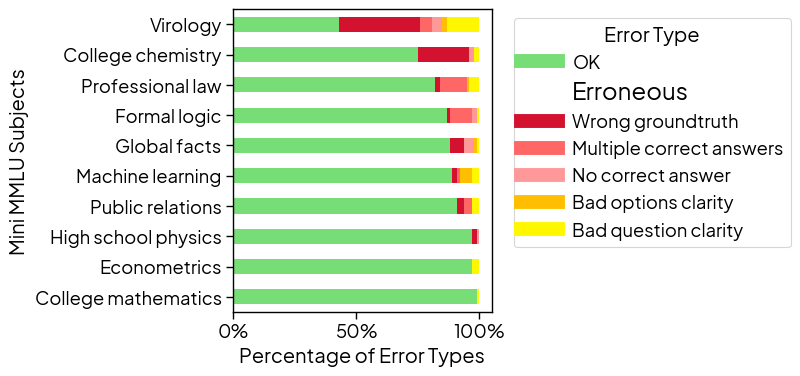

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from datasets import load_dataset

def error_type_capitalize(error_type):
    if error_type.lower() == "ok":
        return "OK"
    else:
        return error_type.replace("_", " ").capitalize()

configs = [
    "college_chemistry",
    "econometrics",
    "formal_logic",
    "global_facts",
    "high_school_physics",
    "public_relations",
    "virology",
    "college_mathematics",
    "machine_learning",
    "professional_law"
]

# Set a general style
sns.set_context("paper", font_scale=1.5)  # Adjust font scale for better readability

# Create a vertically long figure to fit a single column
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the figure size as needed

# Initialize a DataFrame to store all data
all_data = pd.DataFrame()

for config in configs:
    # Load the dataset
    dataset = load_dataset("edinburgh-dawg/mini-mmlu", config)
    
    # Extract the error types from the test set
    error_types = [row["error_type"] for row in dataset["test"]]
    
    # Create a DataFrame and add a column for the configuration
    df = pd.DataFrame(error_types, columns=['Error Type'])
    df["Error Type"] = df["Error Type"].apply(error_type_capitalize)
    df['Config'] = config.replace("_", " ").capitalize()
    
    # Append to the main DataFrame
    all_data = pd.concat([all_data, df], ignore_index=True)

# Pivot the data to get counts of each error type per configuration
data_pivot = all_data.pivot_table(index='Config', columns='Error Type', aggfunc=len, fill_value=0)

# Define the desired order of columns
columns_order = ['OK', 'Wrong groundtruth', 'Multiple correct answers', 'No correct answer', 'Bad options clarity', 'Bad question clarity']

# Reorder the columns according to the specified order
data_pivot = data_pivot[columns_order]

# Sort data by the count of "OK" error type in ascending order
data_pivot = data_pivot.sort_values(by="OK", ascending=False)

# Normalize the data by row to get percentages
data_normalized = data_pivot.div(data_pivot.sum(axis=1), axis=0)

# Define a custom color map
colors = ['#77dd77', '#d2122e', '#ff6666', '#ff9999', '#ffbf00', '#fff700']  # Adjust these colors as needed
color_map = ListedColormap([colors[columns_order.index(et)] for et in columns_order])

# Plot the stacked bar chart using the custom color map
data_normalized.plot(kind='barh', stacked=True, ax=ax, legend=False, colormap=color_map)
ax.set_xlabel('Percentage of Error Types')
ax.set_ylabel('Mini MMLU Subjects')
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))  # Format the x-axis labels as percentages

# Create custom legend handles
handles = [
    plt.Line2D([], [], color=colors[0], lw=10, label='OK'),
    mpatches.Patch(color='none', label='Erroneous'),  # Subheading
    plt.Line2D([], [], color=colors[1], lw=10, label='Wrong groundtruth'),
    plt.Line2D([], [], color=colors[2], lw=10, label='Multiple correct answers'),
    plt.Line2D([], [], color=colors[3], lw=10, label='No correct answer'),
    plt.Line2D([], [], color=colors[4], lw=10, label='Bad options clarity'),
    plt.Line2D([], [], color=colors[5], lw=10, label='Bad question clarity')
]

# Create custom labels
labels = [
    'OK',
    'Erroneous',
    'Wrong groundtruth',
    'Multiple correct answers',
    'No correct answer',
    'Bad options clarity',
    'Bad question clarity'
]

# Create the legend with custom handles and labels
legend = plt.legend(handles=handles, labels=labels, title='Error Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize legend appearance for subheadings
for text in legend.get_texts():
    if text.get_text() in ['Erroneous']:
        text.set_fontsize('large')
        text.set_fontweight('bold')

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.savefig('mini-mmlu-stats.pdf', format='pdf', bbox_inches='tight')

# Show the plots
plt.show()

High school us history contains only OK questions. Skipping...
College physics contains only OK questions. Skipping...
High school geography contains only OK questions. Skipping...


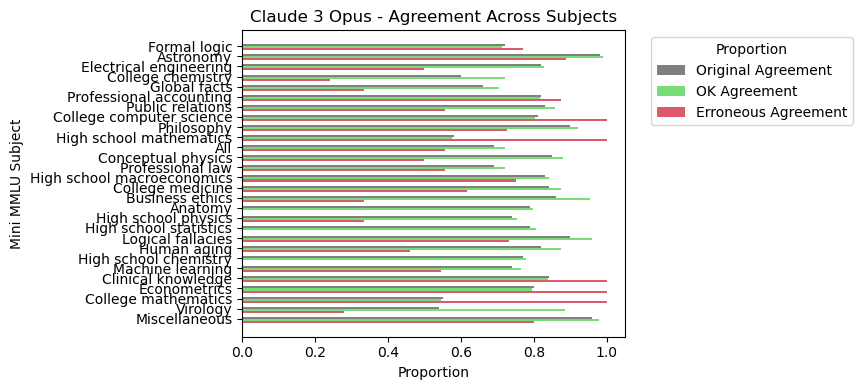

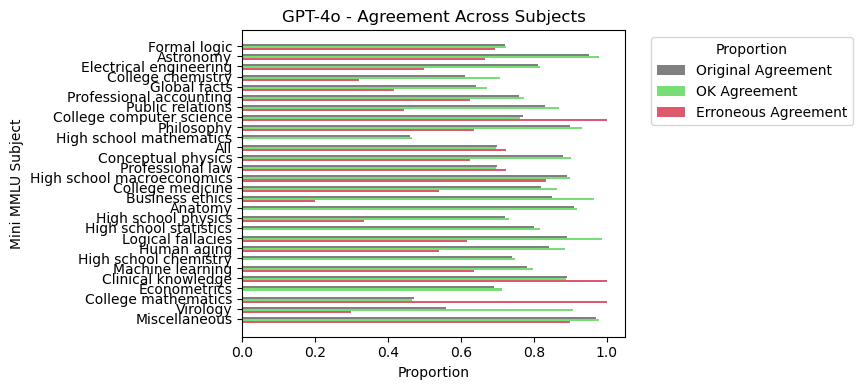

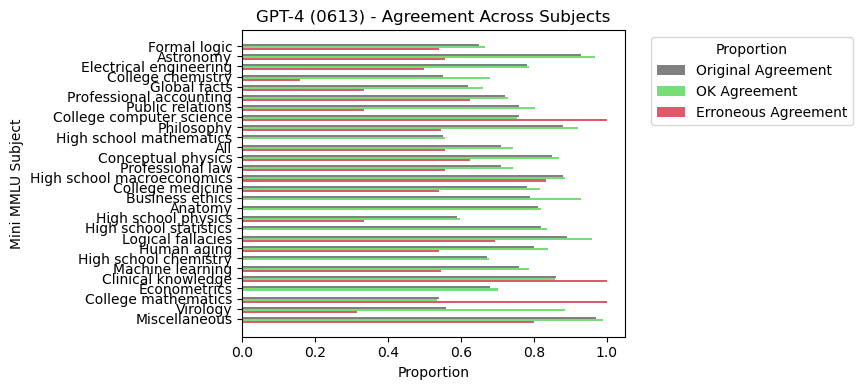

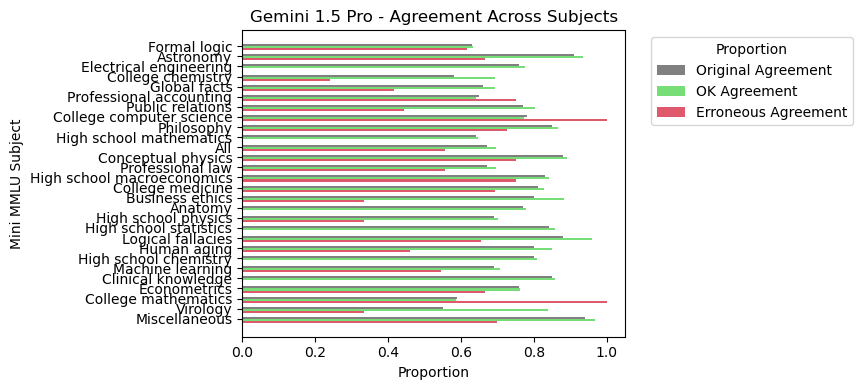

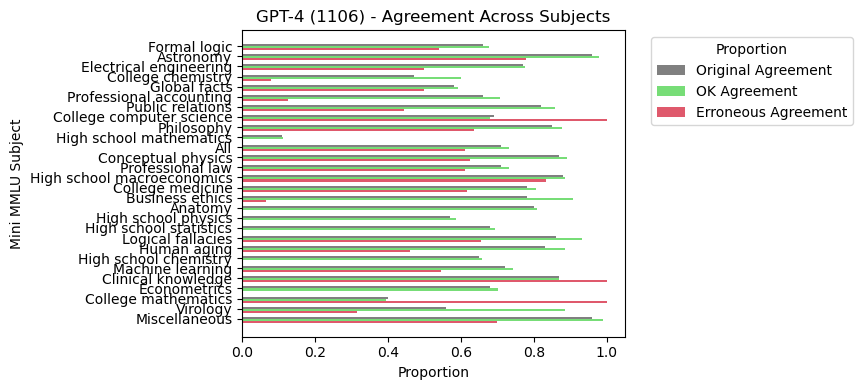

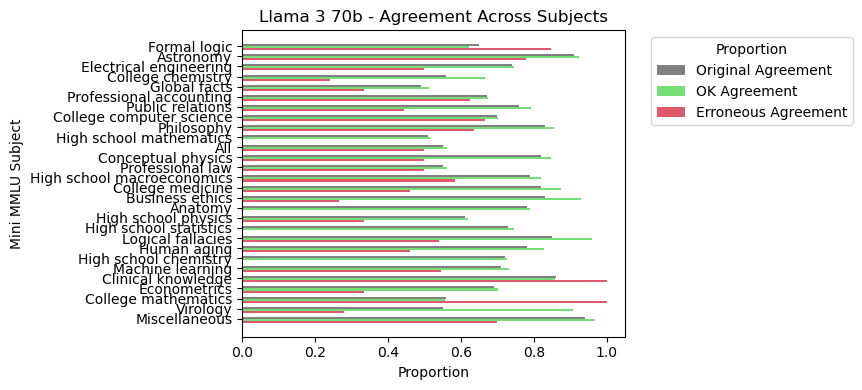

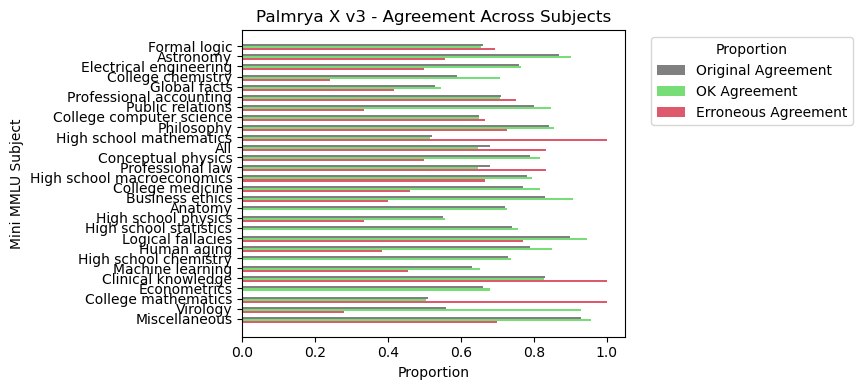

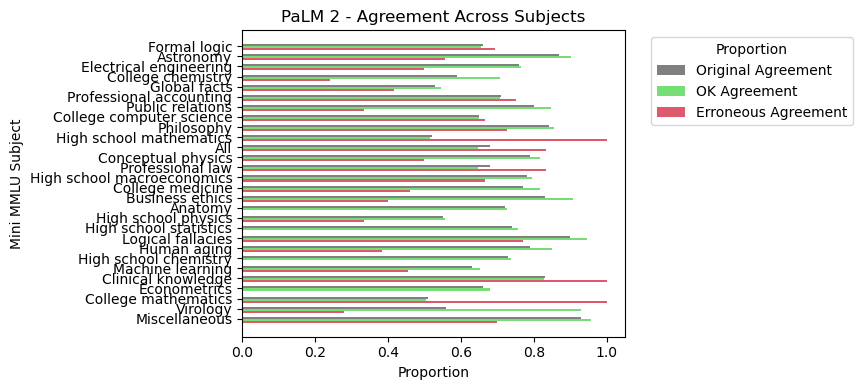

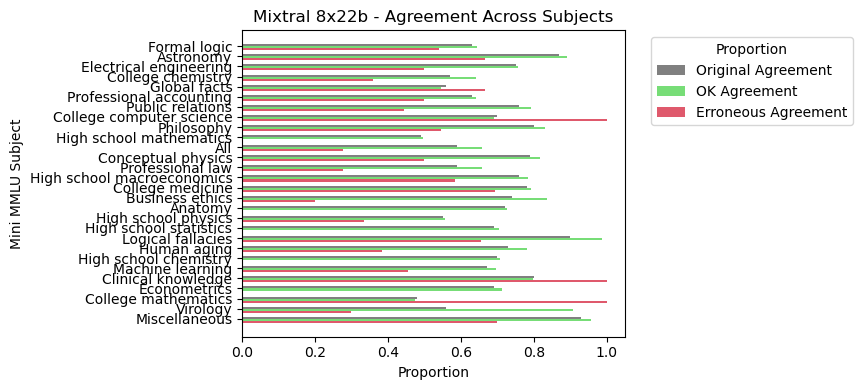

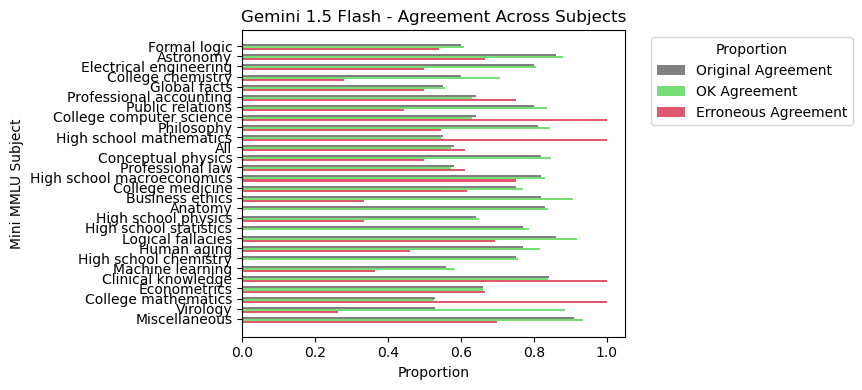

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# List of model columns
model_columns = {
    'anthropic_claude-3-opus-20240229': "Claude 3 Opus",
    'openai_gpt-4o-2024-05-13': "GPT-4o",
    'openai_gpt-4-0613': "GPT-4 (0613)",
    'google_gemini-1.5-pro-preview-0409': "Gemini 1.5 Pro",
    'openai_gpt-4-1106-preview': "GPT-4 (1106)",
    'meta_llama-3-70b': "Llama 3 70b",
    'writer_palmyra-x-v3': "Palmrya X v3",
    'google_text-unicorn@001': "PaLM 2",
    'mistralai_mixtral-8x22b': "Mixtral 8x22b",
    'google_gemini-1.5-flash-preview-0514': "Gemini 1.5 Flash",
}

df_dir = "../outputs/analyses"

# Initialize a dictionary to hold the aggregated data
agg_data = {model_alias: {'agreement': [], 'disagreement': [], 'ok_agreement': [], 'ok_disagreement': [], 'erroneous_agreement': [], 'erroneous_disagreement': []} for model_alias in model_columns.values()}


subject_ids = []
subject_names = []
for filepath in os.listdir(df_dir):
    if not filepath.endswith(".csv"):
        continue
    subject_id = filepath.replace(".csv", "")
    subject_ids += [subject_id]
    subject_names += [subject_id.replace("_", " ").capitalize()]

plot_subject_names = []
plot_subject_ids = []
for subject_id, subject_name in zip(subject_ids, subject_names):
    df = pd.read_csv(f"{df_dir}/{subject_id}.csv")

    # Skip subjects with only OK in error_type
    if df["error_type"].nunique() == 1 and df["error_type"].unique()[0].lower() == "ok":
        print(f"{subject_name} contains only OK questions. Skipping...")
        continue
    else:
        plot_subject_names += [subject_name]
        plot_subject_ids += [subject_id]

    df['groundtruth_answer'] = df['groundtruth_answer'].apply(lambda x: chr(65 + x))

    # Calculate agreement with groundtruth for each model
    for model_id, model_alias in model_columns.items():
        df[f'{model_alias} agreement'] = (df[model_id].str.strip() == df['groundtruth_answer'])
        df[f'{model_alias} disagreement'] = ~df[f'{model_alias} agreement']

    # Calculate overall mean agreement and disagreement for each model
    overall_agreement_disagreement = df[
        [f'{model_alias} agreement' for model_alias in list(model_columns.values())] +
        [f'{model_alias} disagreement' for model_alias in list(model_columns.values())]
    ].mean()

    # Group by binary_error_type and calculate the mean agreement for each model
    agreement_disagreement_by_error_type = df.groupby('binary_error_type')[
        [f'{model_alias} agreement' for model_alias in list(model_columns.values())] +
        [f'{model_alias} disagreement' for model_alias in list(model_columns.values())]
    ].mean()

    # Append the results to the aggregated data
    for model_alias in model_columns.values():
        agg_data[model_alias]['agreement'].append(overall_agreement_disagreement[f'{model_alias} agreement'])
        agg_data[model_alias]['disagreement'].append(overall_agreement_disagreement[f'{model_alias} disagreement'])
        agg_data[model_alias]['ok_agreement'].append(agreement_disagreement_by_error_type.loc[0, f'{model_alias} agreement'])
        agg_data[model_alias]['ok_disagreement'].append(agreement_disagreement_by_error_type.loc[0, f'{model_alias} disagreement'])
        agg_data[model_alias]['erroneous_agreement'].append(agreement_disagreement_by_error_type.loc[1, f'{model_alias} agreement'])
        agg_data[model_alias]['erroneous_disagreement'].append(agreement_disagreement_by_error_type.loc[1, f'{model_alias} disagreement'])


# Prepare and plot the data for each model
for model_alias in model_columns.values():
    # Prepare the DataFrame for plotting
    model_data = {
        subject_name: [
            agg_data[model_alias]['agreement'][i],
            agg_data[model_alias]['disagreement'][i],
            agg_data[model_alias]['ok_agreement'][i],
            agg_data[model_alias]['ok_disagreement'][i],
            agg_data[model_alias]['erroneous_agreement'][i],
            agg_data[model_alias]['erroneous_disagreement'][i]
        ] for i, subject_name in enumerate(plot_subject_names)
    }
    model_df = pd.DataFrame(model_data, index=['Original Agreement', 'Original Disagreement', 'OK Agreement', 'OK Disagreement', 'Erroneous Agreement', 'Erroneous Disagreement']).T

    # Plot the results as a horizontal stacked bar chart
    fig, ax = plt.subplots(figsize=(12, 4))

    # Define the width of each bar
    bar_width = 0.2

    # Define the positions of the bars
    ok_positions = range(len(model_df))

    # Plot agreement and disagreement
    ori_positions = [p + bar_width for p in ok_positions]
    ax.barh(ori_positions, model_df['Original Agreement'], height=bar_width, label='Original Agreement', color='gray')
    # ax.barh(ori_positions, model_df['Original Disagreement'], height=bar_width, left=model_df['Original Agreement'], label='Original Disagreement', color='lightblue')

    # Plot OK agreement and disagreement
    ax.barh(ok_positions, model_df['OK Agreement'], height=bar_width, label='OK Agreement', color='#77dd77')
    # ax.barh(ok_positions, model_df['OK Disagreement'], height=bar_width, left=model_df['OK Agreement'], label='OK Disagreement', color='lightgreen', alpha=0.5)
    
    # Plot grouped agreement and disagreement
    grouped_positions = [p - bar_width for p in ok_positions]
    ax.barh(grouped_positions, model_df['Erroneous Agreement'], height=bar_width, label='Erroneous Agreement', color='#d2122e', alpha=0.7)
    # ax.barh(grouped_positions, model_df['Erroneous Disagreement'], height=bar_width, left=model_df['Erroneous Agreement'], label='Erroneous Disagreement', color='pink', alpha=0.5)

    # Set the yticks to the middle of the group of bars
    ax.set_yticks([p + bar_width / 2 for p in ok_positions])
    ax.set_yticklabels(model_df.index)

    ax.set_title(f'{model_alias} - Agreement Across Subjects')
    ax.set_xlabel('Proportion')
    ax.set_ylabel('Mini MMLU Subject')

    # Move the legend outside of the plot
    ax.legend(title='Proportion', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout(rect=[0, 0, 0.75, 1])

    plt.savefig(f'mini-mmlu-agreement-stats-{model_alias}.pdf', format='pdf', bbox_inches='tight')
    plt.show()


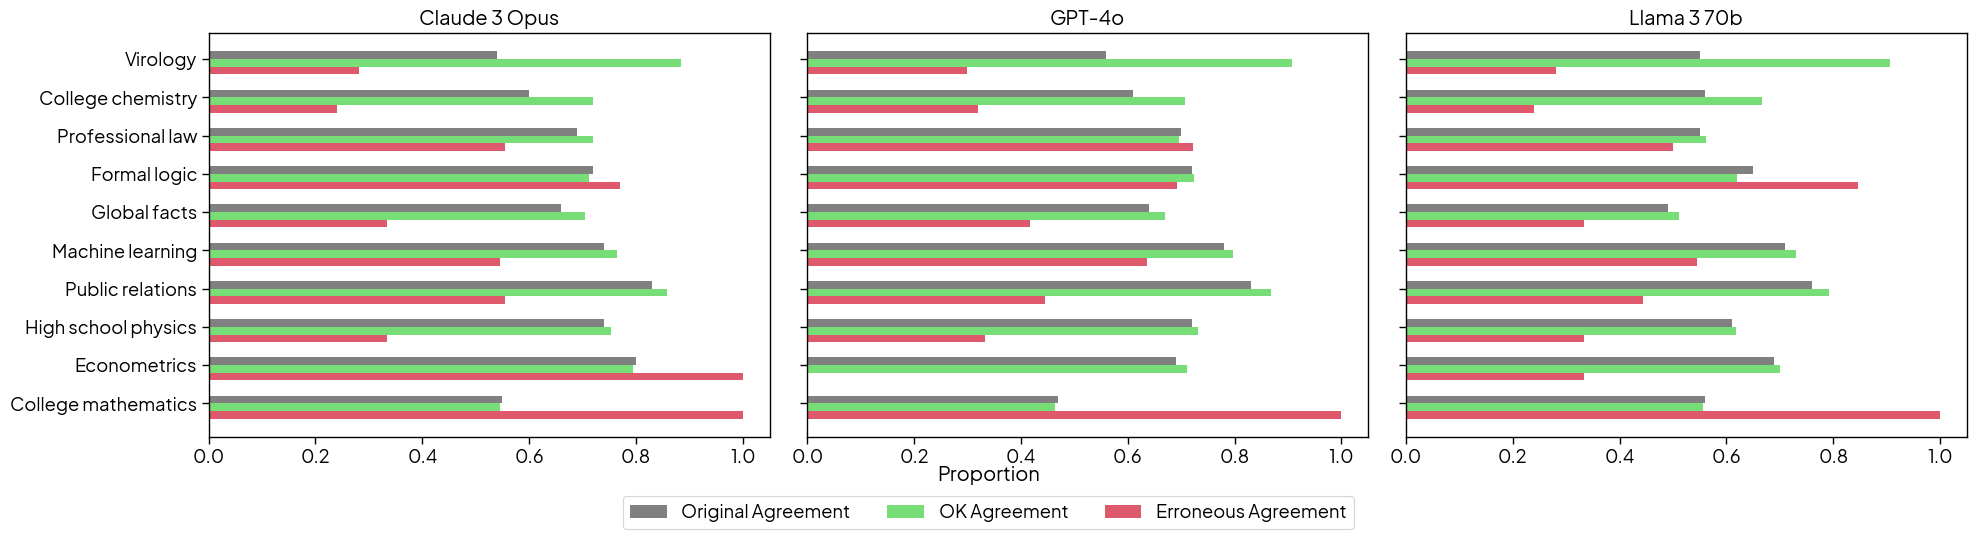

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# List of model columns
model_columns = {
    'anthropic_claude-3-opus-20240229': "Claude 3 Opus",
    'openai_gpt-4o-2024-05-13': "GPT-4o",
    # 'openai_gpt-4-0613': "GPT-4 (0613)",
    # 'google_gemini-1.5-pro-preview-0409': "Gemini 1.5 Pro",
    # 'openai_gpt-4-1106-preview': "GPT-4 (1106)",
    'meta_llama-3-70b': "Llama 3 70b",
    # 'writer_palmyra-x-v3': "Palmrya X v3",
    # 'google_text-unicorn@001': "PaLM 2",
    # 'mistralai_mixtral-8x22b': "Mixtral 8x22b",
    # 'google_gemini-1.5-flash-preview-0514': "Gemini 1.5 Flash",
}

df_dir = "../outputs/multi_expert_helm"

subjects = {
    "College mathematics": "college_mathematics",
    "Econometrics": "econometrics",
    "High school physics": "high_school_physics",
    "Public relations": "public_relations",
    "Machine learning": "machine_learning",
    "Global facts": "global_facts",
    "Formal logic": "formal_logic",
    "Professional law": "professional_law",
    "College chemistry": "college_chemistry",
    "Virology": "virology",
}

# Initialize a dictionary to hold the aggregated data
agg_data = {model_alias: {'agreement': [], 'disagreement': [], 'ok_agreement': [], 'ok_disagreement': [], 'erroneous_agreement': [], 'erroneous_disagreement': []} for model_alias in model_columns.values()}

for subject_name, subject_id in subjects.items():
    df = pd.read_csv(f"{df_dir}/mmlu_multi_experts_{subject_id}.csv")

    df['groundtruth_answer'] = df['groundtruth_answer'].apply(lambda x: chr(65 + x))

    # Calculate agreement with groundtruth for each model
    for model_id, model_alias in model_columns.items():
        df[f'{model_alias} agreement'] = (df[model_id].str.strip() == df['groundtruth_answer'])
        df[f'{model_alias} disagreement'] = ~df[f'{model_alias} agreement']

    # Calculate overall mean agreement and disagreement for each model
    overall_agreement_disagreement = df[
        [f'{model_alias} agreement' for model_alias in list(model_columns.values())] +
        [f'{model_alias} disagreement' for model_alias in list(model_columns.values())]
    ].mean()

    # Group by binary_error_type and calculate the mean agreement for each model
    agreement_disagreement_by_error_type = df.groupby('binary_error_type')[
        [f'{model_alias} agreement' for model_alias in list(model_columns.values())] +
        [f'{model_alias} disagreement' for model_alias in list(model_columns.values())]
    ].mean()

    # Append the results to the aggregated data
    for model_alias in model_columns.values():
        agg_data[model_alias]['agreement'].append(overall_agreement_disagreement[f'{model_alias} agreement'])
        agg_data[model_alias]['disagreement'].append(overall_agreement_disagreement[f'{model_alias} disagreement'])
        agg_data[model_alias]['ok_agreement'].append(agreement_disagreement_by_error_type.loc[0, f'{model_alias} agreement'])
        agg_data[model_alias]['ok_disagreement'].append(agreement_disagreement_by_error_type.loc[0, f'{model_alias} disagreement'])
        agg_data[model_alias]['erroneous_agreement'].append(agreement_disagreement_by_error_type.loc[1, f'{model_alias} agreement'])
        agg_data[model_alias]['erroneous_disagreement'].append(agreement_disagreement_by_error_type.loc[1, f'{model_alias} disagreement'])

# Prepare the plots
fig, axes = plt.subplots(nrows=1, ncols=len(model_columns), figsize=(20, 5), sharey=True)

for ax, (model_id, model_alias) in zip(axes, model_columns.items()):
    # Prepare the DataFrame for plotting
    model_data = {
        subject_name: [
            agg_data[model_alias]['agreement'][i],
            agg_data[model_alias]['disagreement'][i],
            agg_data[model_alias]['ok_agreement'][i],
            agg_data[model_alias]['ok_disagreement'][i],
            agg_data[model_alias]['erroneous_agreement'][i],
            agg_data[model_alias]['erroneous_disagreement'][i]
        ] for i, (subject_name, subject_id) in enumerate(subjects.items())
    }
    model_df = pd.DataFrame(model_data, index=['Original Agreement', 'Original Disagreement', 'OK Agreement', 'OK Disagreement', 'Erroneous Agreement', 'Erroneous Disagreement']).T

    # Define the width of each bar
    bar_width = 0.2

    # Define the positions of the bars
    ok_positions = range(len(model_df))

    # Plot agreement and disagreement
    ori_positions = [p + bar_width for p in ok_positions]
    ax.barh(ori_positions, model_df['Original Agreement'], height=bar_width, label='Original Agreement', color='gray')
    # ax.barh(ori_positions, model_df['Original Disagreement'], height=bar_width, left=model_df['Original Agreement'], label='Original Disagreement', color='lightblue')

    # Plot OK agreement and disagreement
    ax.barh(ok_positions, model_df['OK Agreement'], height=bar_width, label='OK Agreement', color='#77dd77')
    # ax.barh(ok_positions, model_df['OK Disagreement'], height=bar_width, left=model_df['OK Agreement'], label='OK Disagreement', color='lightgreen', alpha=0.5)
    
    # Plot grouped agreement and disagreement
    grouped_positions = [p - bar_width for p in ok_positions]
    ax.barh(grouped_positions, model_df['Erroneous Agreement'], height=bar_width, label='Erroneous Agreement', color='#d2122e', alpha=0.7)
    # ax.barh(grouped_positions, model_df['Erroneous Disagreement'], height=bar_width, left=model_df['Erroneous Agreement'], label='Erroneous Disagreement', color='pink', alpha=0.5)

    # Set the yticks to the middle of the group of bars
    ax.set_yticks([p + bar_width / 2 for p in ok_positions])
    ax.set_yticklabels(model_df.index)

    ax.set_title(f'{model_alias}')

# Set common labels
fig.text(0.5, 0.025, 'Proportion', ha='center', va='center')
# fig.text(0.06, 0.5, 'Mini MMLU Subject', ha='center', va='center', rotation='vertical')

# Add a common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.tight_layout()
plt.savefig('mini-mmlu-agreement-stats-all-models.pdf', format='pdf', bbox_inches='tight')
plt.show()
